<a href="https://colab.research.google.com/github/shreyasj18/Machine-Learning/blob/main/ML_Practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [4]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [5]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


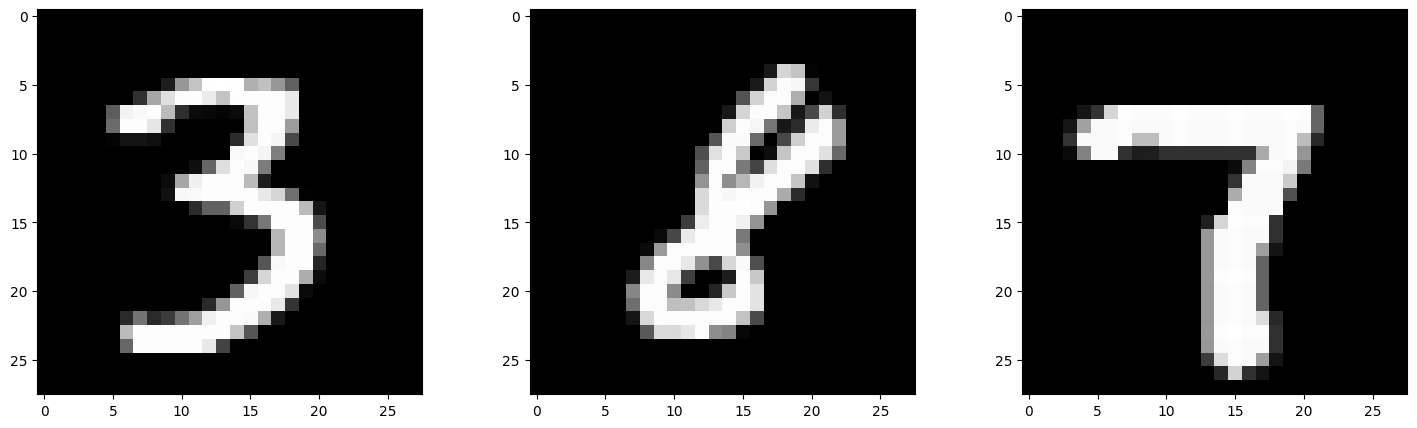

In [6]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

In [8]:
# Load the Fashion MNIST dataset.
((X_train_fashion, y_train_fashion), (_, _)) = fashion_mnist.load_data()

# The labels in the Fashion MNIST dataset are encoded as integers.
print(y_train_fashion[0:9])

4422102/4422102 [==============================] - 0s 0us/step
[9 0 0 3 0 2 7 2 5]


In [9]:
y_train_onehot = to_categorical(y_train_fashion[0:9])
print(y_train_onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [10]:
# Convert integer labels to one-hot encoded vectors.
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

In [11]:
model = tf.keras.Sequential()

# Build the model.
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,  activation="softmax"))

# Display the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
training_results = model.fit(X_train,
                             y_train,
                             epochs=21,
                             batch_size=64,
                             validation_data=(X_valid, y_valid));""

Epoch 1/21
782/782 [==============================] - 6s 6ms/step - loss: 0.2833 - accuracy: 0.9173 - val_loss: 0.1755 - val_accuracy: 0.9450
Epoch 2/21
782/782 [==============================] - 4s 5ms/step - loss: 0.1202 - accuracy: 0.9634 - val_loss: 0.1227 - val_accuracy: 0.9639
Epoch 3/21
782/782 [==============================] - 5s 6ms/step - loss: 0.0833 - accuracy: 0.9738 - val_loss: 0.1186 - val_accuracy: 0.9652
Epoch 4/21
782/782 [==============================] - 4s 5ms/step - loss: 0.0631 - accuracy: 0.9801 - val_loss: 0.0939 - val_accuracy: 0.9734
Epoch 5/21
782/782 [==============================] - 4s 5ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0954 - val_accuracy: 0.9747
Epoch 6/21
782/782 [==============================] - 5s 6ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0962 - val_accuracy: 0.9728
Epoch 7/21
782/782 [==============================] - 4s 5ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0928 - val_accuracy: 0.9762
Epoch 

''

In [14]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

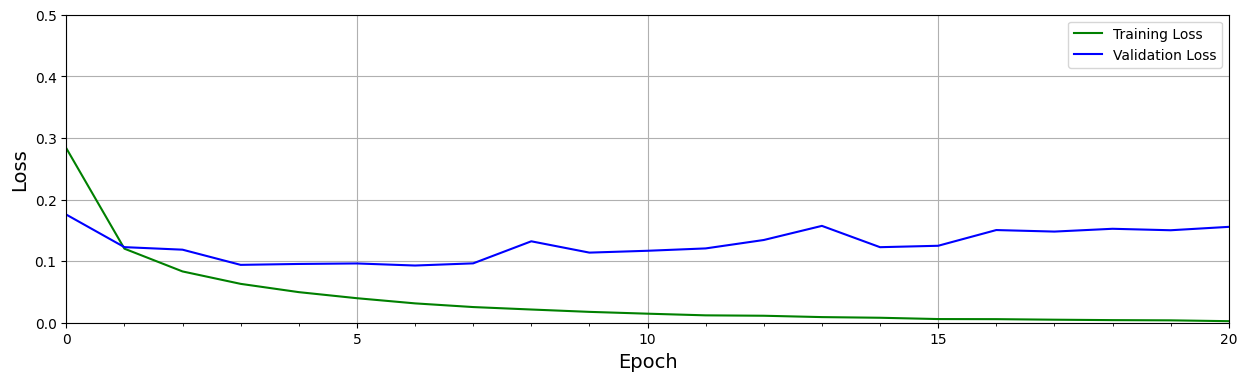

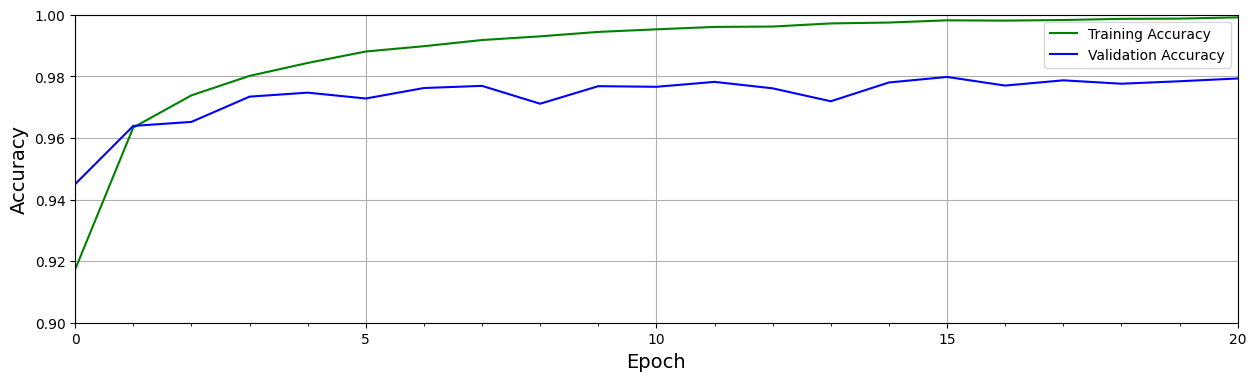

In [15]:
# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [16]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

313/313 [==============================] - 1s 3ms/step
Ground truth for test digit:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Predictions for each class:

digit: 0  probability:  4.1595147e-25
digit: 1  probability:  3.5031794e-20
digit: 2  probability:  3.6671106e-15
digit: 3  probability:  1.7074917e-17
digit: 4  probability:  1.9407972e-27
digit: 5  probability:  1.6445913e-26
digit: 6  probability:  1.1898094e-31
digit: 7  probability:  0.99999994
digit: 8  probability:  6.3416012e-27
digit: 9  probability:  8.068284e-21


In [17]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 1s 4ms/step


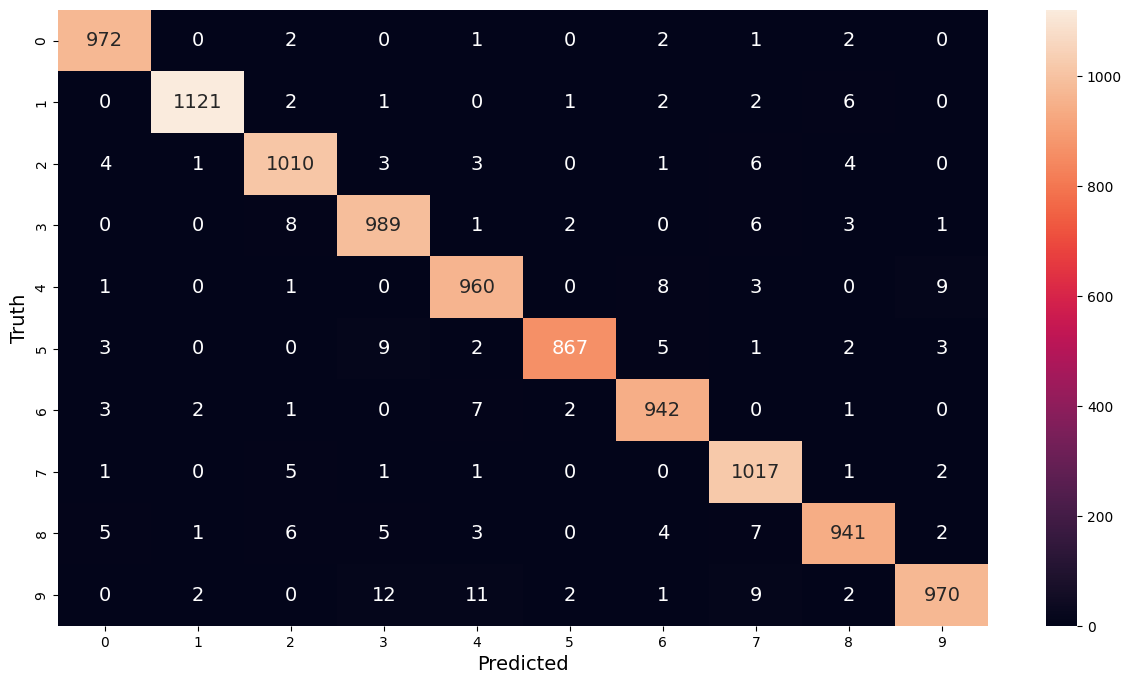

In [18]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()